In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
symbol = 'aapl'
start = '2000-01-01'
end = datetime.now()

# We use the yfinance library to download the data of the stock symbol we want. In our  case is 'Apple'
data = yf.download(symbol, start ,end)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57315500


In [3]:
# We drop all columns exept the close price
data = data[['Close']]
data.tail()

,Close
Date,
2024-03-20,178.669998
2024-03-21,171.369995
2024-03-22,172.279999
2024-03-25,170.850006
2024-03-26,169.710007


In [4]:
# Function to calculate Moving Averages (MA) for different time periods

def MA():
    # Define the number of days for each Moving Average
    days_20 = 20
    days_9 = 9
    days_50 = 50
    days_100 = 100

    # Calculate the 9-day Moving Average and add as a new column 'MA_9'
    data['MA_9'] = data.Close.rolling(window=days_9).mean()

    # Calculate the 20-day Moving Average and add as a new column 'MA_20'
    data['MA_20'] = data.Close.rolling(window=days_20).mean()

    # Calculate the 50-day Moving Average and add as a new column 'MA_50'
    data['MA_50'] = data.Close.rolling(window=days_50).mean()

    # Calculate the 100-day Moving Average and add as a new column 'MA_100'
    data['MA_100'] = data.Close.rolling(window=days_100).mean()

    # Drop rows with NaN values created due to rolling window
    data.dropna(inplace=True)

    # Return the updated DataFrame with the added Moving Average columns
    return data


In [5]:
# Call the MA function to calculate Moving Averages and update the 'data' DataFrame
data = MA()

# Display the updated 'data' DataFrame with Moving Average columns
data

,Close,MA_9,MA_20,MA_50,MA_100
Date,,,,,
2000-05-24,0.782924,0.866940,0.947963,1.059420,1.023852
2000-05-25,0.779157,0.846742,0.930336,1.054244,1.021649
2000-05-26,0.771205,0.832233,0.913511,1.047960,1.020209
2000-05-30,0.781808,0.814252,0.897105,1.041275,1.018742
2000-05-31,0.750000,0.797014,0.881982,1.034311,1.017759
...,...,...,...,...,...
2024-03-20,178.669998,173.547777,175.889000,182.882199,185.284600
2024-03-21,171.369995,173.618888,175.239000,182.606799,185.329400
2024-03-22,172.279999,173.566666,174.727000,182.328599,185.370000


In [6]:
# Function to calculate Relative Strength Index (RSI) for stock market data

def RSI():
    # Define the RSI calculation interval (typically 14 days)
    interval = 14

    # Calculate the difference between consecutive closing prices
    close_diff = data.Close.diff()

    # Separate upward price movements (positive differences)
    up = close_diff.where(close_diff > 0, 0)

    # Separate downward price movements (negative differences)
    down = -close_diff.where(close_diff < 0, 0)

    # Calculate the average of upward movements over the interval
    avg_up = up.rolling(interval).mean()

    # Calculate the average of downward movements over the interval
    avg_down = down.rolling(interval).mean()

    # Calculate Relative Strength (RS) by dividing avg_up by avg_down
    RS = avg_up / avg_down

    # Calculate the Relative Strength Index (RSI) using the RS value
    RSI = 100 - 100 / (1 + RS)

    # Add the RSI values as a new column 'RSI' to the original DataFrame 'data'
    data['RSI'] = RSI

    # Return the updated DataFrame with the added 'RSI' column
    return data


In [7]:
data = RSI()
data.dropna(inplace=True)

# Create a percent change column
data['Percent_change'] = data.Close.pct_change()

In [8]:
# Create a new column 'Next_day' by shifting the Close price by 1 day
data['Next_day'] = data.Close.shift(-1)

# Make a copy of the data, as we will need the original data later
new_df = data.copy()

# Drop rows with NaN values, which are created due to shifting
new_df.dropna(inplace=True)

# Return the DataFrame 'new_df' with NaN values removed
new_df


,Close,MA_9,MA_20,MA_50,MA_100,RSI,Percent_change,Next_day
Date,,,,,,,,
2000-06-14,0.807478,0.833333,0.818701,0.955829,1.010566,53.846203,-0.042989,0.824777
2000-06-15,0.824777,0.833147,0.814683,0.949590,1.009328,56.855410,0.021423,0.814174
2000-06-16,0.814174,0.833023,0.810414,0.942592,1.007447,56.405993,-0.012856,0.862723
2000-06-19,0.862723,0.836744,0.811586,0.937492,1.006236,60.837007,0.059630,0.904018
2000-06-20,0.904018,0.841394,0.816636,0.932045,1.005455,70.116550,0.047866,0.993304
...,...,...,...,...,...,...,...,...
2024-03-19,176.080002,172.473333,176.071500,183.019999,185.208900,39.084223,0.013585,178.669998
2024-03-20,178.669998,173.547777,175.889000,182.882199,185.284600,46.057614,0.014709,171.369995
2024-03-21,171.369995,173.618888,175.239000,182.606799,185.329400,37.281360,-0.040857,172.279999


In [9]:
import statsmodels.api as sm

# Define the features (independent variables) for the model
train_stat = new_df[['MA_9', 'MA_20', 'MA_50', 'MA_100', 'RSI', 'Percent_change']]

# Define the target variable (dependent variable) for the model
test_stat = new_df[['Close']]

# Add a constant term to the features
train_stat = sm.add_constant(train_stat)

# Create and fit the Ordinary Least Squares (OLS) model
stat_model = sm.OLS(test_stat, train_stat).fit()

# Print the summary of the model
print(stat_model.summary())


# R-squared: 

# This is the coefficient of determination, indicating the proportion of the variance in the dependent variable that
# is predictable from the independent variables. It shows that 99.9% of the variance in the dependent variable Close 
# is explained by the independent variables in the model.

#F-statistic:

# The F-statistic tests the overall significance of the model. A high F-statistic with a very low p-value 
#(Prob (F-statistic)) suggests that the model is significant.



# Intercept (const): -1.1586 - This is the intercept term (constant) in the regression equation when all other predictors are zero.

#Looking at the coefficients and p-values from the summary:

# MA_9: Coef = 1.3222, P>|t| = 0.000 (Significant)
# MA_20: Coef = -0.3813, P>|t| = 0.000 (Significant)
# MA_50: Coef = 0.0458, P>|t| = 0.002 (Significant)
# MA_100: Coef = 0.0153, P>|t| = 0.061 (Not Significant) -> if the P>|t| was bigger number , we may drop the column.In our case we wont do it 
# RSI: Coef = 0.0211, P>|t| = 0.000 (Significant)
# Percent_change: Coef = 17.4471, P>|t| = 0.000 (Significant)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.171e+06
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:13:28   Log-Likelihood:                -11092.
No. Observations:                5982   AIC:                         2.220e+04
Df Residuals:                    5975   BIC:                         2.225e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1354      0.079    -14.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


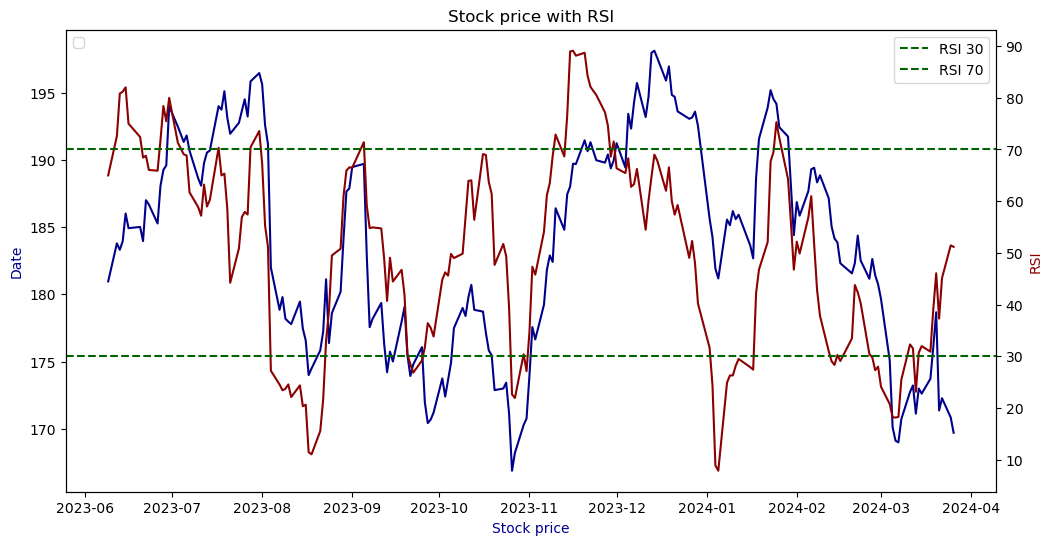

"\n We can look for a strategy when the RSI index is above 70, we short the stock, when is below 30 we buy the stock\n It is mostly used for a 30-70 range, however you can do it on 20-80. The choice between them often depends on \n the trader's preference, trading style, and the market being analyzed.\n "

In [10]:
fig,ax1= plt.subplots(figsize=(12,6))
ax2= ax1.twinx()

last_200_days = 200

# Plot the stock price on ax1

ax1.plot(data.Close.iloc[-last_200_days:], color= 'darkblue')

# Plot the RSI on ax2

ax2.plot(data.RSI.iloc[-last_200_days:], color ='darkred')

# Add horizontal lines for RSI thresholds

ax2.axhline(30, linestyle='--', color='darkgreen', label ='RSI 30')
ax2.axhline(70, linestyle='--', color='darkgreen', label = 'RSI 70')

# Set labels and title

ax1.set_ylabel('Date', color ='darkblue')
ax1.set_xlabel('Stock price', color ='darkblue')
ax2.set_ylabel('RSI', color = 'darkred')

ax1.set_title   ('Stock price with RSI')

ax1.legend(loc = 'upper left')
ax2.legend(loc ='upper right')


plt.show()

"""
 We can look for a strategy when the RSI index is above 70, we short the stock, when is below 30 we buy the stock
 It is mostly used for a 30-70 range, however you can do it on 20-80. The choice between them often depends on 
 the trader's preference, trading style, and the market being analyzed.
 """

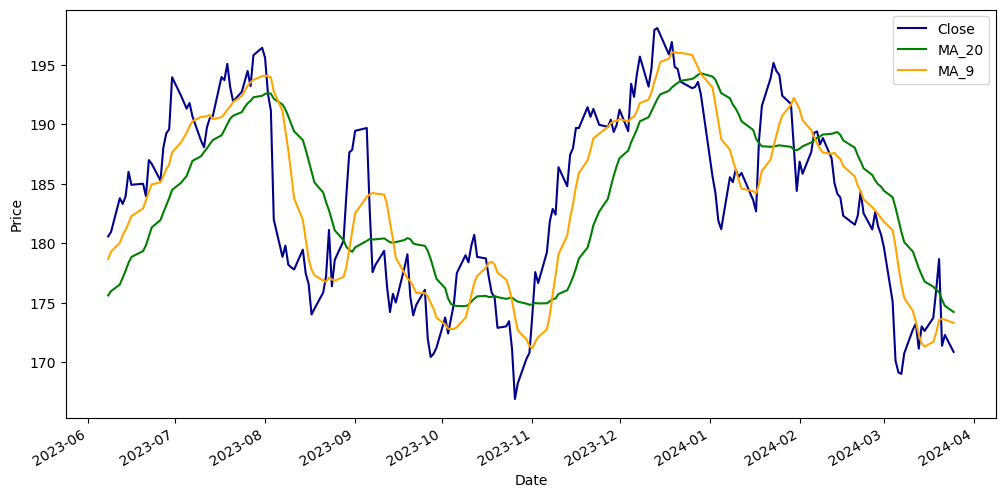

In [11]:
# Create a plot showing the closing price, 20-day MA, and 9-day MA for the last 200 days

plt.figure(figsize=(12,6))

new_df.Close[-last_200_days:].plot( color = 'darkblue')
new_df.MA_20[-last_200_days:].plot( color = 'green')
new_df.MA_9[-last_200_days:].plot( color = 'orange')

# Add labels to the plot

plt.legend()
plt.ylabel('Price')

plt.show()

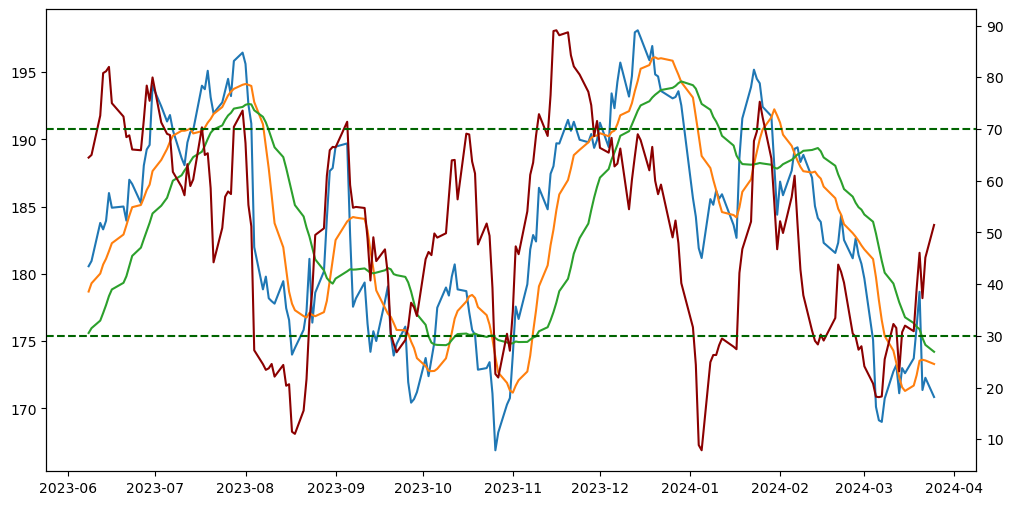

In [12]:
# Lets combine the RSI with the MA 9 and 20 days

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()


ax1.plot(new_df.Close.iloc[-last_200_days:])
ax1.plot(new_df.MA_9.iloc[-last_200_days:])
ax1.plot(new_df.MA_20.iloc[-last_200_days:])

ax2.plot(new_df.RSI.iloc[-last_200_days:], color = 'darkred')
ax2.axhline(30,linestyle = '--', color = 'darkgreen')
ax2.axhline(70,linestyle = '--', color = 'darkgreen')


# Eww , that is confusing...

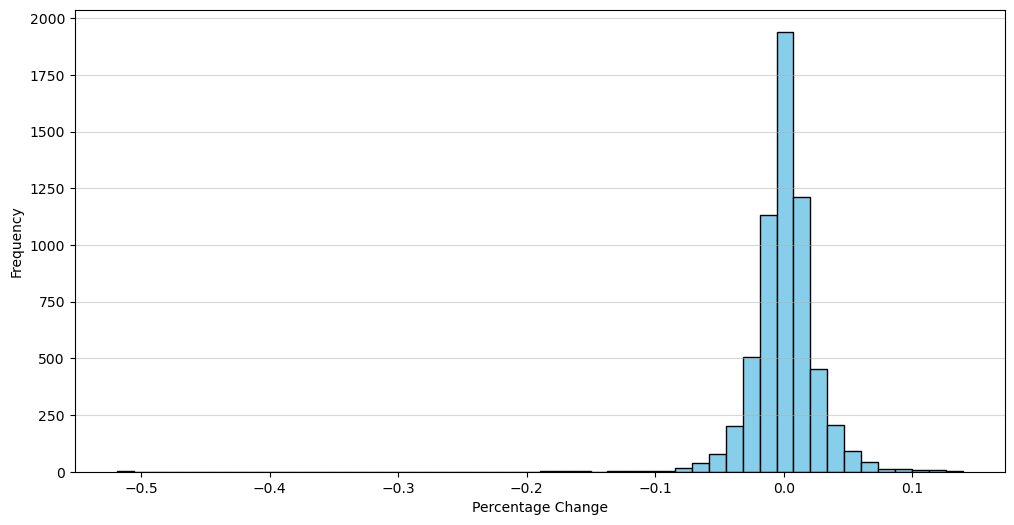

In [13]:
# Create a histogram to visualize the distribution of percentage changes
plt.figure(figsize=(12, 6))
new_df.Percent_change.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')

# Add labels to the plot
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')

# Adding grid lines
plt.grid(axis='y', alpha=0.5)

plt.show()


In [14]:
new_df.describe()

,Close,MA_9,MA_20,MA_50,MA_100,RSI,Percent_change,Next_day
count,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000
mean,37.940155,37.824849,37.666644,37.214120,36.432933,55.188200,0.001192,37.968390
std,53.023598,52.898960,52.730618,52.208752,51.250920,17.596302,0.024100,53.048786
min,0.234286,0.238492,0.246795,0.255500,0.257663,3.142791,-0.518692,0.234286
25%,2.467322,2.441448,2.438473,2.365720,2.329176,42.488842,-0.009780,2.468928
50%,15.721250,15.676905,15.685750,15.519514,15.605300,55.201426,0.000833,15.741072
75%,43.121250,43.057847,42.970656,42.834938,43.015350,68.442459,0.012636,43.125000
max,198.110001,196.100003,194.308501,190.925200,185.775200,97.864628,0.139049,198.110001


In [15]:
# Calculate mean, median and standard deviation of the 'Close' column for the last 2 years
mean_2_years = new_df.Close.iloc[-504:].mean()
std_2_years =  new_df.Close.iloc[-504:].std()
median_2_years = new_df.Close.iloc[-504:].median()
last_2_years_data = -504

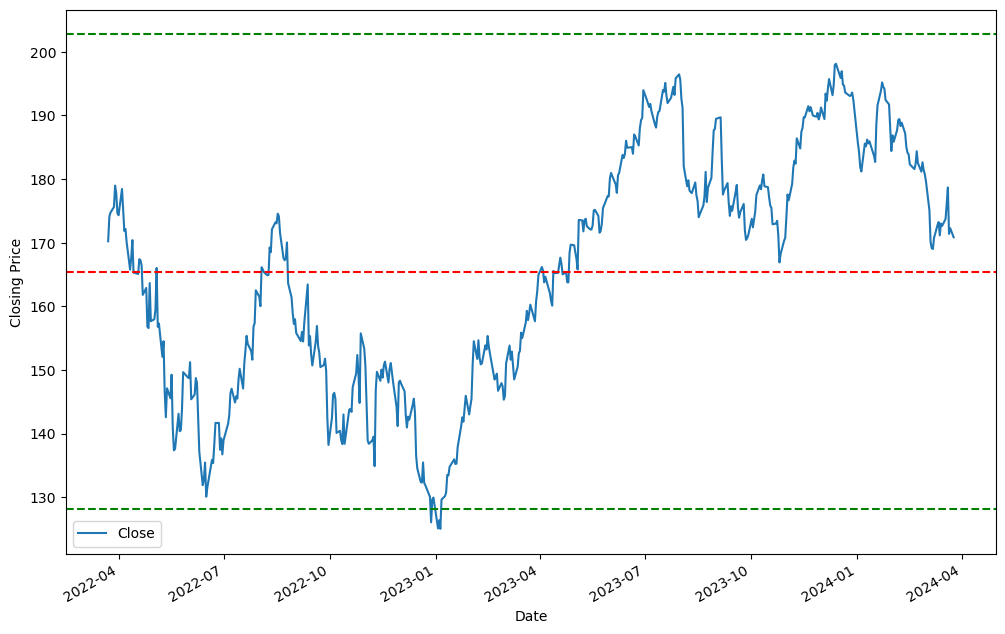

In [16]:
# Bonus strategy

# Add horizontal lines for mean, mean + 2*std, and mean - 2*std

plt.figure(figsize= (12,8))
new_df.Close.iloc[last_2_years_data:].plot()
plt.axhline(mean_2_years, color= 'r', linestyle = '--')
plt.axhline(mean_2_years + 2 * std_2_years, color = 'g', linestyle = '--')
plt.axhline(mean_2_years - 2 * std_2_years ,color ='g', linestyle = '--')


plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# If the price is below / above the green line, we should buy/short. When price reaches the red line, we should exit the position


# Machine Learning Algorithms 

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
# Define features (X) and target variable (y)

X = new_df.drop(columns='Next_day', axis=1)
y = new_df['Next_day']

# Split the data into training and testing sets

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Define the models to train

models = {'Linear Regression': LinearRegression(),
         'Random Forest': RandomForestRegressor()}



# Define a function to train and test the models

def train_test(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[name] = score
    return model_scores

# Define the models to train

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

# Call the function with the models and data
model_scores = train_test(models, X_train, X_test, y_train, y_test)
model_scores

 
# We observe that the Random Forest model performs slightly better than the Linear Regression model.

{'Linear Regression': 0.9995445647062569, 'Random Forest': 0.9994923545697393}

<AxesSubplot:>

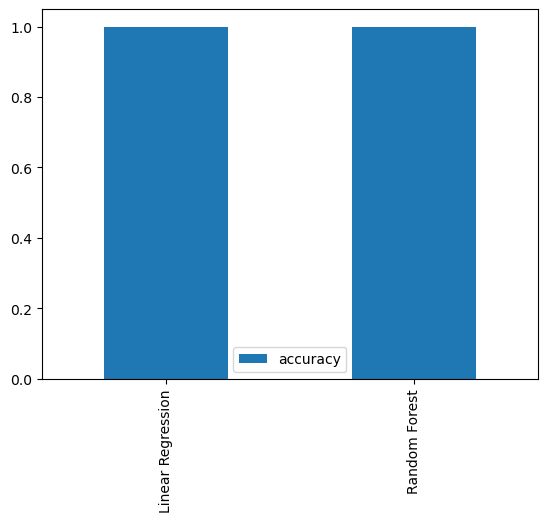

In [20]:
models_df = pd.DataFrame(model_scores, index=['accuracy'])
models_df.T.plot(kind='bar')

In [21]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Random Forest (We want to improve the model.)

rf_grid={'n_estimators':np.arange(10,100,10),
              'max_depth':[None,3,5],
               'min_samples_split': np.arange(2,20,2),
               'min_samples_leaf':np.arange(1,20,2),
                'max_features':[0.5,1,'auto','sqrt']}

# Create the RandomizedSearchCV object

rf_model = RandomizedSearchCV(RandomForestRegressor(),param_distributions = rf_grid,cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the training data

rf_model.fit(X_train,y_train)
                              

Wall time: 13.3 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 3, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42)

In [22]:
# Look for the best parameters 
rf_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_features': 0.5,
 'max_depth': None}

In [23]:
# Create a new RandomForestRegressor model with the best parameters found  during the RandomizedSearchCV process

new_rf_model = RandomForestRegressor(n_estimators=80, min_samples_split=14, min_samples_leaf=11, max_features=0.5,
                                    max_depth=None,random_state=1)

# Fit the new model on the training data

new_rf_model.fit(X_train,y_train)

# Calculate the coefficient of determination (R-squared) score of the new model on the test data to evaluate its performance
new_rf_model.score(X_test,y_test)

# Unfortunately, our new model performs worse than the default model. Despite this, we have decided to continue using the 
# new model, as the difference in performance is not significant.

0.99941305997126

In [24]:
# Use the trained Random Forest Regressor model (new_rf_model) to make predictions on the test data (X_test)

y_pred = new_rf_model.predict(X_test)
y_pred

array([  0.67681212, 161.00334412, 145.83977868, ..., 164.36397738,
        21.59593546,  77.7928217 ])

            prediction  real_price  difference
Date                                          
2004-09-23    0.676812    0.665893   -0.010919
2022-03-07  161.003344  157.440002   -3.563342
2021-07-15  145.839779  146.389999    0.550221
2005-09-16    1.822105    1.880000    0.057895
2024-02-15  184.110365  182.309998   -1.800367
...                ...         ...         ...
2009-12-11    6.953286    7.035000    0.081714
2023-03-23  158.108155  160.250000    2.141845
2021-12-01  164.363977  163.759995   -0.603983
2012-10-31   21.595935   21.305000   -0.290935
2020-02-03   77.792822   79.712502    1.919680

[1496 rows x 3 columns]


<AxesSubplot:ylabel='Frequency'>

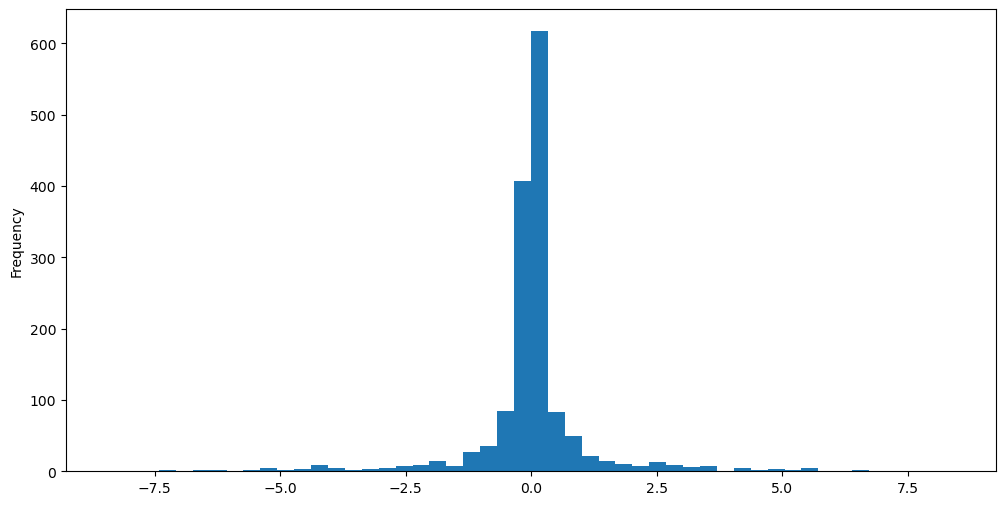

In [25]:
# Create a DataFrame to compare the predicted prices (y_pred) with the real prices (y_test)

diff = pd.DataFrame({'prediction':y_pred,
              'real_price': y_test,
              'difference': y_test-y_pred})
print(diff)

plt.figure(figsize=(12,6))
diff.difference.plot(kind='hist', bins =50)


In [26]:
# We take the last data we have with closing price and all the indicators.

data.tail(1)

,Close,MA_9,MA_20,MA_50,MA_100,RSI,Percent_change,Next_day
Date,,,,,,,,
2024-03-26,169.710007,173.144445,173.5655,181.7096,185.365,51.155527,-0.006673,NaN


In [27]:
# We are creating a new DataFrame containing the values of the last day's closing price, moving averages, RSI, 
# and percentage change. In this case, we use df.Close.iloc[-1] to obtain the last days closing price

next_day_df  = pd.DataFrame({'Close':[data.Close.iloc[-1]], 
                       'MA_9':[data.MA_9.iloc[-1]],
                        'MA_20':[data.MA_20.iloc[-1]],
                        'MA_50':[data.MA_50.iloc[-1]],
                         'MA_100':[data.MA_100.iloc[-1]],
                        'RSI':[data.RSI.iloc[-1]],
                         'Percent_change':[data.Percent_change.iloc[-1]]})



next_day_df

,Close,MA_9,MA_20,MA_50,MA_100,RSI,Percent_change
0,169.710007,173.144445,173.5655,181.7096,185.365,51.155527,-0.006673


In [28]:
# Next, we utilize our model to predict the closing price for the following day

next_day_prediction =pd.DataFrame({'Date': datetime.now().strftime('%Y-%m-%d'),
            'Prediction for next day':new_rf_model.predict(next_day_df)})
next_day_prediction

,Date,Prediction for next day
0,2024-03-27,171.890393


In [29]:
"""
To predict the price of a stock, it is advisable to run the code before the market opens. This ensures that we use the most 
recent data available, including the closing price at the time the code is executed.
"""

'\nTo predict the price of a stock, it is advisable to run the code before the market opens. This ensures that we use the most \nrecent data available, including the closing price at the time the code is executed.\n'